Name : **Niddhi Rijhwani** Class : **D15B** RollNo : **47**

Dataset Link : https://www.kaggle.com/datasets/arashnic/imbalanced-data-practice?resource=download

# Experiment 5: Regression Analysis

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/content/aug_train.csv')
df.head(10)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,167647,Male,22,1,7.0,1,< 1 Year,No,2630.0,152.0,16,0
1,17163,Male,42,1,28.0,0,1-2 Year,Yes,43327.0,26.0,135,0
2,32023,Female,66,1,33.0,0,1-2 Year,Yes,35841.0,124.0,253,0
3,87447,Female,22,1,33.0,0,< 1 Year,No,27645.0,152.0,69,0
4,501933,Male,28,1,46.0,1,< 1 Year,No,29023.0,152.0,211,0
5,295775,Female,25,1,25.0,1,< 1 Year,No,27954.0,152.0,23,0
6,71711,Male,51,1,8.0,0,1-2 Year,Yes,2630.0,26.0,209,0
7,331781,Male,38,1,28.0,1,1-2 Year,No,2630.0,26.0,51,0
8,290704,Female,45,1,28.0,0,1-2 Year,Yes,55873.0,124.0,262,0
9,344792,Male,42,1,28.0,0,1-2 Year,Yes,27801.0,122.0,217,1


In [3]:
df['Vehicle_Age'].unique()

array(['< 1 Year', '1-2 Year', '> 2 Years'], dtype=object)

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
# Encode categorical variables
label_encoders = {}
categorical_cols = ['Gender', 'Vehicle_Age', 'Vehicle_Damage']

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store for later inverse transformation if needed

# # Standardize numerical features
# scaler = StandardScaler()
# num_cols = ['Age', 'Annual_Premium', 'Vintage']
# df[num_cols] = scaler.fit_transform(df[num_cols])

In [6]:
df.drop(columns=['id'], inplace=True)

In [7]:
df.to_csv('exp5_aids.csv', index=False)

In [8]:
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,22,1,7.0,1,1,0,2630.0,152.0,16,0
1,1,42,1,28.0,0,0,1,43327.0,26.0,135,0
2,0,66,1,33.0,0,0,1,35841.0,124.0,253,0
3,0,22,1,33.0,0,1,0,27645.0,152.0,69,0
4,1,28,1,46.0,1,1,0,29023.0,152.0,211,0


In [9]:
print(df['Response'].value_counts(normalize=True))


Response
0    0.836189
1    0.163811
Name: proportion, dtype: float64


Dataset is highly imbalanced:

    Response = 0: 83.6% of the data

    Response = 1: 16.4% of the data

**a) Perform Linear and Logistic regression to find out relation between variables**

In [10]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, classification_report

# Drop 'id' column (not useful for regression)


# Define features (X) and target variable (y)
X = df.drop(columns=['Response'])  # All columns except 'Response'
y = df['Response']

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# --- PART A: LINEAR REGRESSION (Exploring relationships between variables) ---
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Predictions
y_pred_linear = linear_reg.predict(X_test)

# Evaluate Linear Regression
mse = mean_squared_error(y_test, y_pred_linear)
print("Linear Regression MSE:", mse)


Linear Regression MSE: 0.10669700082947899


1. Linear Regression

    MSE = 0.1067 → The model's error is relatively low, indicating a decent fit.

    However, since Response is categorical (0 or 1), linear regression is not the best choice for prediction.

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Logistic Regression Accuracy: 0.8177179416728815

Confusion Matrix:
 [[60816  3095]
 [10837  1683]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.95      0.90     63911
           1       0.35      0.13      0.19     12520

    accuracy                           0.82     76431
   macro avg       0.60      0.54      0.55     76431
weighted avg       0.77      0.82      0.78     76431



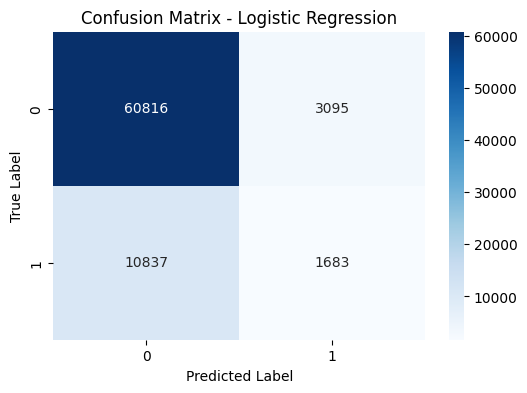

In [11]:
# --- PART B: LOGISTIC REGRESSION (Classification for Response variable) ---
logistic_reg = LogisticRegression(max_iter=100)
logistic_reg.fit(X_train, y_train)

# Predictions
y_pred_logistic = logistic_reg.predict(X_test)

# Evaluate Logistic Regression
accuracy = accuracy_score(y_test, y_pred_logistic)
conf_matrix = confusion_matrix(y_test, y_pred_logistic)
classification_rep = classification_report(y_test, y_pred_logistic)

print("\nLogistic Regression Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_rep)

# Visualizing Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

2. Logistic Regression

    Accuracy: 81.77% (Good overall)

    Class 0 (No Response) Detection: High (95% Recall, 90% F1-score)
    
    Class 1 (Response) Detection: Poor (13% Recall, 19% F1-score)

*Test Predictions*

In [12]:
import numpy as np
import pandas as pd

# Define a new sample input (numerical encoding applied)
sample_input = pd.DataFrame({
    'Gender': [1],  # Male = 1, Female = 0
    'Age': [28],  # Age (Already numerical)
    'Driving_License': [1],  # 1 = Has License, 0 = No License
    'Region_Code': [46.0],  # Categorical region
    'Previously_Insured': [1],  # 0 = Not Insured, 1 = Insured
    'Vehicle_Age': [0],  # 1-2 Year = 1
    'Vehicle_Damage': [0],  # Yes = 1, No = 0
    'Annual_Premium': [30000.0],  # Annual Premium Amount
    'Policy_Sales_Channel': [152.0],  # Sales Channel
    'Vintage': [211]  # Number of Days in System
})

# Predict probability using logistic regression
predicted_prob = logistic_reg.predict_proba(sample_input)[:, 1]  # Probability of Response = 1

# Apply default threshold (0.5) to classify
predicted_class = (predicted_prob >= 0.5).astype(int)

# Display predictions
print("Predicted Probability of Response (1):", predicted_prob[0])
print("Predicted Response Class (0 or 1):", predicted_class[0])


Predicted Probability of Response (1): 0.0058786791642945185
Predicted Response Class (0 or 1): 0


In [13]:
import pandas as pd

# Define two sample inputs
sample_inputs = pd.DataFrame({
    'Gender': [1, 0],  # Male = 1, Female = 0
    'Age': [40, 25],  # First case is older, second case is younger
    'Driving_License': [1, 1],  # Both have licenses
    'Region_Code': [10.0, 35.0],  # Different regions
    'Previously_Insured': [1, 0],  # First is insured (low risk), second is not (high risk)
    'Vehicle_Age': [0, 2],  # First case has a newer vehicle, second has an older vehicle
    'Vehicle_Damage': [0, 1],  # First has no damage, second has damage
    'Annual_Premium': [25000.0, 50000.0],  # First has lower premium, second has higher premium
    'Policy_Sales_Channel': [120.0, 150.0],  # Sales channels
    'Vintage': [150, 90]  # First case has longer history, second is newer
})

# Predict probabilities
predicted_probs = logistic_reg.predict_proba(sample_inputs)[:, 1]  # Probability of Response = 1

# Apply default threshold (0.5) to classify
predicted_classes = (predicted_probs >= 0.5).astype(int)

# Display predictions
for i, case in enumerate(["Case 1 (Expected Response = 0)", "Case 2 (Expected Response = 1)"]):
    print(f"\n{case}:")
    print("Predicted Probability of Response (1):", predicted_probs[i])
    print("Predicted Response Class (0 or 1):", predicted_classes[i])



Case 1 (Expected Response = 0):
Predicted Probability of Response (1): 0.07669222201141514
Predicted Response Class (0 or 1): 0

Case 2 (Expected Response = 1):
Predicted Probability of Response (1): 0.07464708440802792
Predicted Response Class (0 or 1): 0


**Improving Logistic Regression for Imbalanced Data**

    Since class 1 (positive Response) is underrepresented, we need to balance the dataset using:

    1. Class Weighting: Assigning higher importance to minority class.

    2. SMOTE (Synthetic Minority Oversampling Technique): Generating synthetic samples for class 1.

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Logistic Regression (Balanced) Accuracy: 0.7025814133008857

Confusion Matrix:
 [[41379 22532]
 [  200 12320]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.65      0.78     63911
           1       0.35      0.98      0.52     12520

    accuracy                           0.70     76431
   macro avg       0.67      0.82      0.65     76431
weighted avg       0.89      0.70      0.74     76431



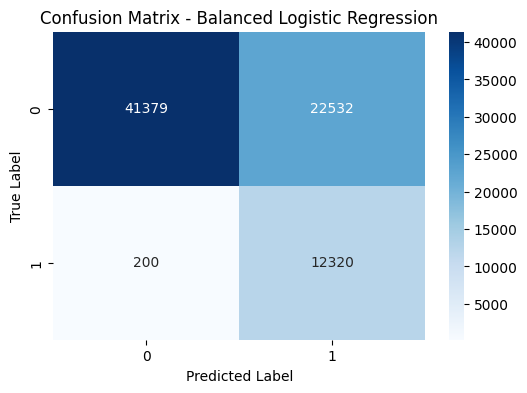

In [14]:
# Logistic Regression with Class Weights
logistic_reg_balanced = LogisticRegression(max_iter=1000, class_weight='balanced')
logistic_reg_balanced.fit(X_train, y_train)

# Predictions
y_pred_balanced = logistic_reg_balanced.predict(X_test)

# Evaluate Model
accuracy_balanced = accuracy_score(y_test, y_pred_balanced)
conf_matrix_balanced = confusion_matrix(y_test, y_pred_balanced)
classification_rep_balanced = classification_report(y_test, y_pred_balanced)

print("\nLogistic Regression (Balanced) Accuracy:", accuracy_balanced)
print("\nConfusion Matrix:\n", conf_matrix_balanced)
print("\nClassification Report:\n", classification_rep_balanced)

# Visualizing Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix_balanced, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Balanced Logistic Regression")
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Logistic Regression (SMOTE) Accuracy: 0.714147400923709

Confusion Matrix:
 [[43465 20446]
 [ 1402 11118]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.68      0.80     63911
           1       0.35      0.89      0.50     12520

    accuracy                           0.71     76431
   macro avg       0.66      0.78      0.65     76431
weighted avg       0.87      0.71      0.75     76431



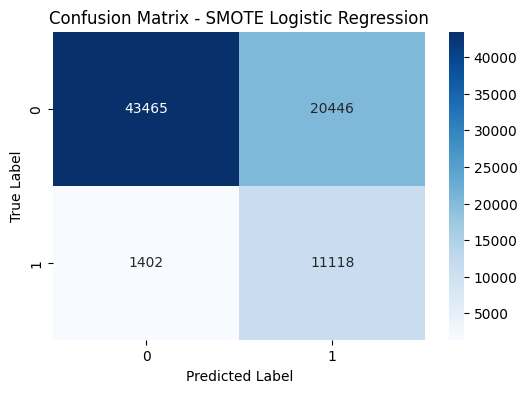

In [15]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance dataset
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train logistic regression on balanced data
logistic_reg_smote = LogisticRegression(max_iter=1000)
logistic_reg_smote.fit(X_train_resampled, y_train_resampled)

# Predictions
y_pred_smote = logistic_reg_smote.predict(X_test)

# Evaluate Model
accuracy_smote = accuracy_score(y_test, y_pred_smote)
conf_matrix_smote = confusion_matrix(y_test, y_pred_smote)
classification_rep_smote = classification_report(y_test, y_pred_smote)

print("\nLogistic Regression (SMOTE) Accuracy:", accuracy_smote)
print("\nConfusion Matrix:\n", conf_matrix_smote)
print("\nClassification Report:\n", classification_rep_smote)

# Visualizing Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix_smote, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - SMOTE Logistic Regression")
plt.show()


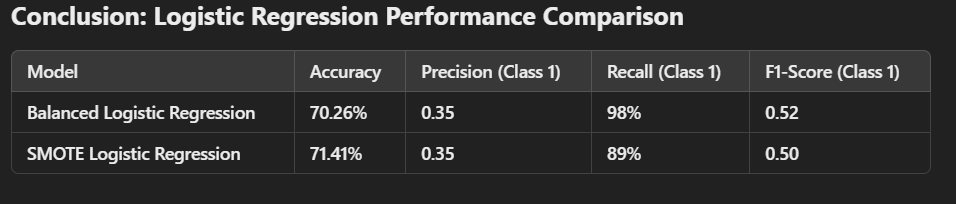

**Threshold Tuning**

    The model uses 0.5 as the default probability cutoff for classification.

    We can tune this threshold to reduce false positives and improve precision.

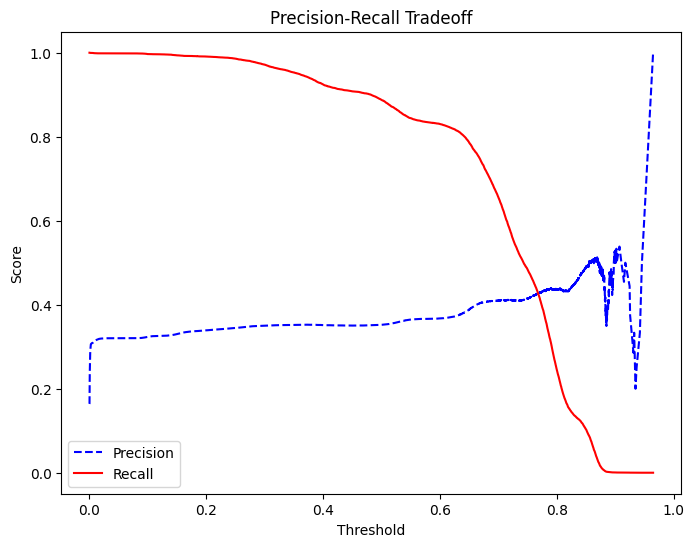

In [16]:
from sklearn.metrics import precision_recall_curve

# Get probability predictions instead of class labels
y_probs = logistic_reg_smote.predict_proba(X_test)[:, 1]

# Compute precision-recall tradeoff
precisions, recalls, thresholds = precision_recall_curve(y_test, y_probs)

# Plot Precision-Recall Curve
plt.figure(figsize=(8,6))
plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "r-", label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.legend()
plt.title("Precision-Recall Tradeoff")
plt.show()


Adjusted Logistic Regression Accuracy: 0.7623608221794822

Confusion Matrix:
 [[48430 15481]
 [ 2682  9838]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.76      0.84     63911
           1       0.39      0.79      0.52     12520

    accuracy                           0.76     76431
   macro avg       0.67      0.77      0.68     76431
weighted avg       0.86      0.76      0.79     76431



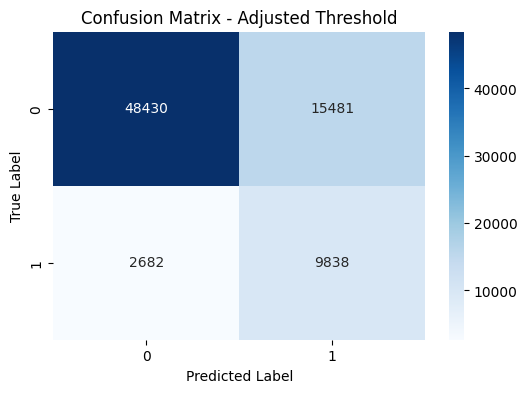

In [17]:
# Set the optimal threshold (adjust based on your graph)
optimal_threshold = 0.65  # Adjust if needed

# Get predicted probabilities
y_probs = logistic_reg_smote.predict_proba(X_test)[:, 1]

# Apply new threshold
y_pred_adjusted = (y_probs >= optimal_threshold).astype(int)

# Evaluate new predictions
accuracy_adjusted = accuracy_score(y_test, y_pred_adjusted)
conf_matrix_adjusted = confusion_matrix(y_test, y_pred_adjusted)
classification_rep_adjusted = classification_report(y_test, y_pred_adjusted)

print("\nAdjusted Logistic Regression Accuracy:", accuracy_adjusted)
print("\nConfusion Matrix:\n", conf_matrix_adjusted)
print("\nClassification Report:\n", classification_rep_adjusted)

# Visualizing Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix_adjusted, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Adjusted Threshold")
plt.show()


*TESTING(PREDICTING)*

In [18]:
# Define sample input (replace with actual values)
sample_input = pd.DataFrame({
    'Gender': [1],
    'Age': [35],
    'Driving_License': [1],
    'Region_Code': [30.0],
    'Previously_Insured': [0],
    'Vehicle_Age': [0],  # Convert '1-2 Year' to numerical encoding
    'Vehicle_Damage': [0],  # Convert 'Yes' to 1
    'Annual_Premium': [27600.0],
    'Policy_Sales_Channel': [150.0],
    'Vintage': [70]
})

# Predict probability using Logistic Regression
predicted_prob = logistic_reg_smote.predict_proba(sample_input)[:, 1]

# Predict class (0 or 1) using the optimal threshold (e.g., 0.35)
optimal_threshold = 0.2
predicted_class = (predicted_prob >= optimal_threshold).astype(int)

print("Predicted Probability:", predicted_prob[0])
print("Predicted Response Class (0 or 1):", predicted_class[0])


Predicted Probability: 0.18576109836793434
Predicted Response Class (0 or 1): 0


In [19]:
# Predict probabilities on test data
predicted_probs = logistic_reg_balanced.predict_proba(sample_inputs)[:, 1]  # Probability of Response = 1

# Apply threshold (0.35 instead of 0.5)
optimal_threshold = 0.35
predicted_classes_adjusted = (predicted_probs >= optimal_threshold).astype(int)

# Display predictions
for i, case in enumerate(["Case 1 (Expected Response = 0)", "Case 2 (Expected Response = 1)"]):
    print(f"\n{case} (Threshold = 0.35):")
    print("Predicted Probability of Response (1):", predicted_probs[i])
    print("Predicted Response:", predicted_classes_adjusted[i])



Case 1 (Expected Response = 0) (Threshold = 0.35):
Predicted Probability of Response (1): 0.0061951279102181005
Predicted Response: 0

Case 2 (Expected Response = 1) (Threshold = 0.35):
Predicted Probability of Response (1): 0.6177484640624586
Predicted Response: 1


In [20]:
# Predict probabilities on test data
predicted_probs = logistic_reg_smote.predict_proba(sample_inputs)[:, 1]  # Probability of Response = 1

# Apply threshold (0.35 instead of 0.5)
optimal_threshold = 0.35
predicted_classes_adjusted = (predicted_probs >= optimal_threshold).astype(int)

# Display predictions
for i, case in enumerate(["Case 1 (Expected Response = 0)", "Case 2 (Expected Response = 1)"]):
    print(f"\n{case} (Threshold = 0.35):")
    print("Predicted Probability of Response (1):", predicted_probs[i])
    print("Predicted Response:", predicted_classes_adjusted[i])



Case 1 (Expected Response = 0) (Threshold = 0.35):
Predicted Probability of Response (1): 0.0009099840740001093
Predicted Response: 0

Case 2 (Expected Response = 1) (Threshold = 0.35):
Predicted Probability of Response (1): 0.45901073819885546
Predicted Response: 1
